In [1]:
import cv2 # pip install opencv-python
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# grid configuration
ROWS = 6
COLS = 12

# probability of color given the distance to ghost - sensor model
#               distance   0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16
P_COLOR_DIST = {'green':  [0.05, 0.05, 0.15, 0.30, 0.30, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00, 1.00, 1.00],
                'yellow': [0.05, 0.15, 0.25, 0.50, 0.55, 0.30, 0.25, 0.25, 0.25, 0.20, 0.15, 0.15, 0.10, 0.05, 0.00, 0.00, 0.00],
                'orange': [0.15, 0.55, 0.50, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.05, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
                'red':    [0.75, 0.25, 0.10, 0.05, 0.05, 0.05, 0.05, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]}

In [3]:
# grid visualization - receives grid cell probabilities (p) and list of measurements (m)
def draw_grid(p = None, m = None):
    CELL_SIZE = 60
    color_map = {'green': (0,255,0), 'yellow': (0,255,255), 'orange': (0,127,255), 'red': (0,0,255)}

    img = np.zeros((ROWS*CELL_SIZE,COLS*CELL_SIZE,3), dtype=np.uint8)

    if p is not None:
        for i in range(ROWS):
            for j in range(COLS):
                img[i*CELL_SIZE:(i+1)*CELL_SIZE,j*CELL_SIZE:(j+1)*CELL_SIZE] = np.asarray((int(255.0*p[i,j]),int(255.0*p[i,j]),int(255.0*p[i,j])))
                text = str(p[i,j])[:5] if p[i,j] >= 0.001 else '0.000'
                img = cv2.putText(img, text, (j*CELL_SIZE+10, (i+1)*CELL_SIZE-25), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,0,255), 1, cv2.LINE_AA)

    for i in range(0,ROWS+1):
        img = cv2.line(img, (0, i*CELL_SIZE), (COLS*CELL_SIZE, i*CELL_SIZE), (255,0,0), 3)
    for i in range(0,COLS+1):
        img = cv2.line(img, (i*CELL_SIZE, 0), (i*CELL_SIZE, ROWS*CELL_SIZE), (255,0,0), 3)

    if m is not None:
        for color, i, j in m:
            img = cv2.rectangle(img, (j*CELL_SIZE+3, i*CELL_SIZE+3), ((j+1)*CELL_SIZE-3, (i+1)*CELL_SIZE-3), color_map[color], 3)

    plt.axis('off')
    plt.imshow(img[:,:,::-1])
    plt.show()

In [4]:
# sensor simulation
def get_measurement(row, col, ghost):
    dist = abs(ghost[0]-row)+abs(ghost[1]-col)
    probs = []
    for color in P_COLOR_DIST.keys():
        probs.append(P_COLOR_DIST[color][dist])
    return np.random.choice(list(P_COLOR_DIST.keys()), p=probs)

In [5]:
# given a new measurement, update the probability of each location being the ghost location
def update_belief(p, row, col, color):
    x = np.linspace(0, COLS-1, COLS).astype(np.int32)
    y = np.linspace(0, ROWS-1, ROWS).astype(np.int32)
    coords = np.stack(np.meshgrid(x, y), axis=2) - np.asarray([[[col, row]]])
    dist = np.sum(np.absolute(coords), axis=2)
    p_ = np.asarray(P_COLOR_DIST[color])[dist] * p # P(R | G) * P(G)
    return p_/np.sum(p_)

In [12]:
# random ghost location
ghost = (random.randrange(ROWS), random.randrange(COLS))

# start with uniform distribution (highest uncertainty) and no observations
p = np.asarray([[1./(ROWS*COLS) for _ in range(COLS)] for _ in range(ROWS)])
observations = []

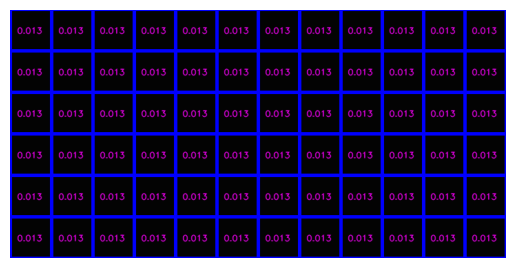

Enter row: 3
Enter col: 6


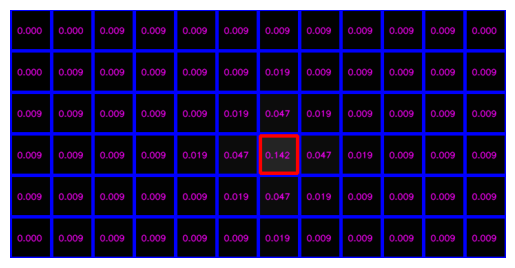

Continue? (Y/N): Y
Enter row: 2
Enter col: 6


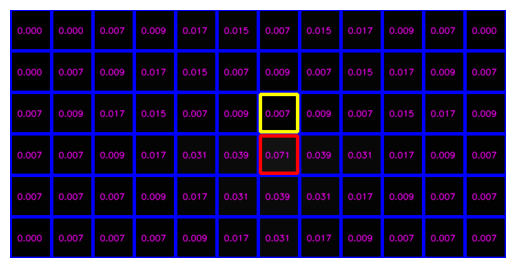

Continue? (Y/N): Y
Enter row: 4
Enter col: 6


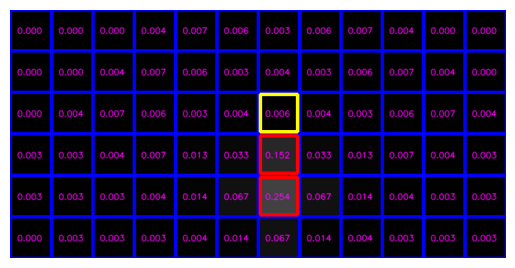

Continue? (Y/N): Y
Enter row: 5
Enter col: 6


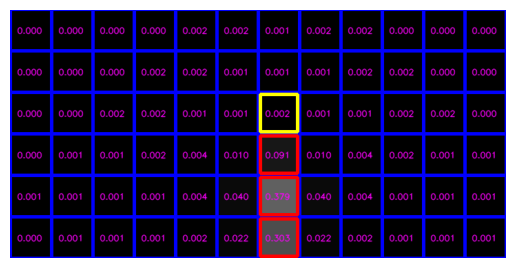

Continue? (Y/N): Y
Enter row: 4
Enter col: 5


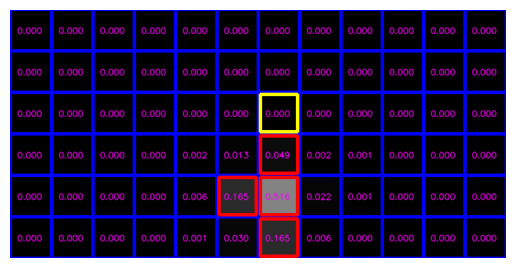

Continue? (Y/N): Y
Enter row: 4
Enter col: 7


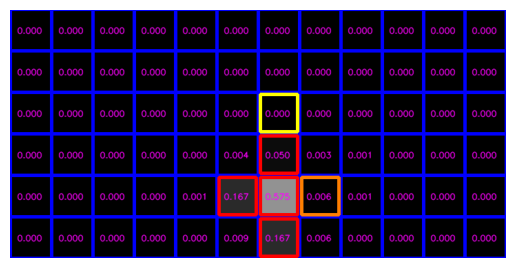

Continue? (Y/N): Y
Enter row: 3
Enter col: 5


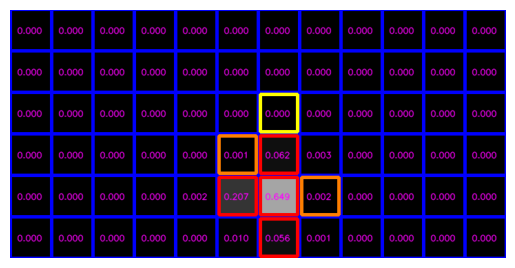

Continue? (Y/N): Y
Enter row: 5
Enter col: 5


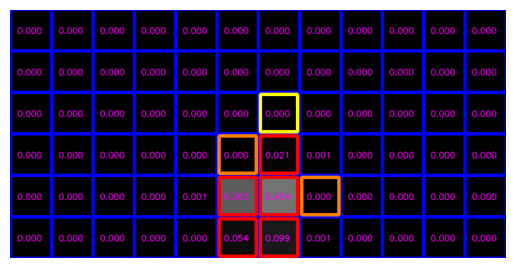

Continue? (Y/N): Y
Enter row: 4
Enter col: 4


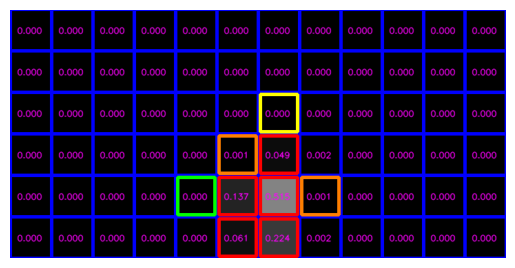

Continue? (Y/N): Y
Enter row: 5
Enter col: 4


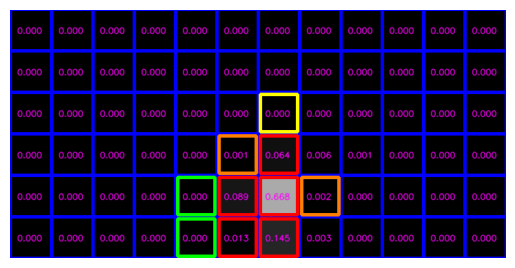

Continue? (Y/N): Y
Enter row: 5
Enter col: 7


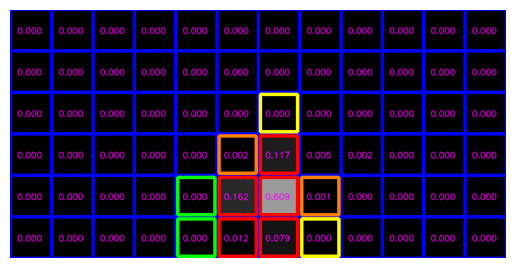

Continue? (Y/N): Y
Enter row: 3
Enter col: 7


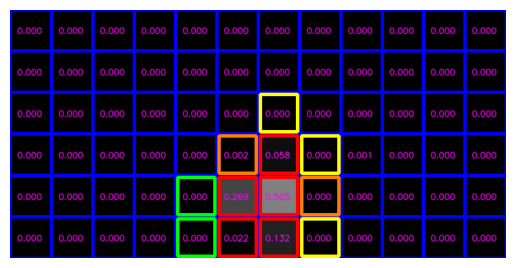

Continue? (Y/N): Y
Enter row: 4
Enter col: 4


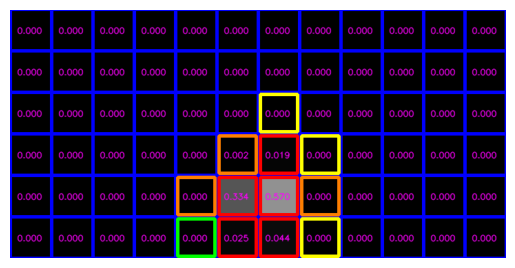

Continue? (Y/N): Y
Enter row: 5
Enter col: 4


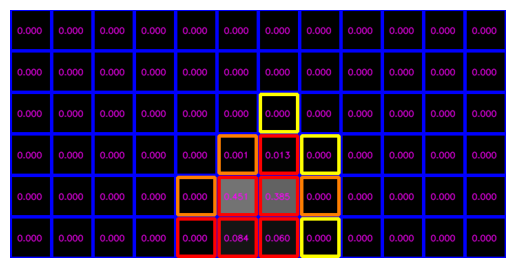

Continue? (Y/N): Y
Enter row: 4
Enter col: 5


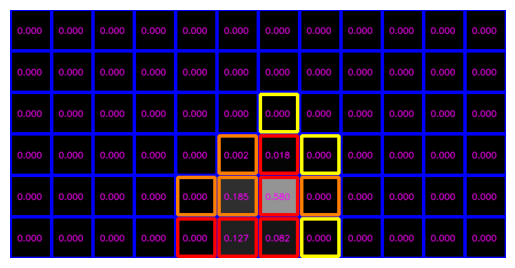

Continue? (Y/N): Y
Enter row: 4
Enter col: 6


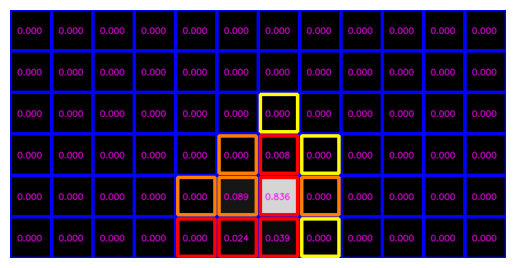

Continue? (Y/N): N


Final guess!


Enter row: 4
Enter col: 6


Correct!


In [13]:
### measure & update loop
draw_grid(p=p, m=observations)

flag = True
while flag:
    row = int(input('Enter row:'))
    col = int(input('Enter col:'))

    # measure
    color = get_measurement(row, col, ghost)
    observations.append((color, row, col))

    # update
    p = update_belief(p, row, col, color)

    draw_grid(p=p, m=observations)

    opt = str(input('Continue? (Y/N):'))[0]
    if opt == 'N':
      flag = False

print('Final guess!')
row = int(input('Enter row:'))
col = int(input('Enter col:'))
if row == ghost[0] and col == ghost[1]:
    print('Correct!')
else:
    print('Missed! Ghost is at ({},{}).'.format(ghost[0], ghost[1]))

In [14]:
print(ghost)

(4, 6)
